In [ ]:
start = 500
for i in range(10):
    print(start,",",end="")
    start +=100
for i in range(10):
    print(start,",",end="")
    start -=100


500
600
700
800
900
1000
1100
1200
1300
1400
1500
1400
1300
1200
1100
1000
900
800
700
600


/home/swaggo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


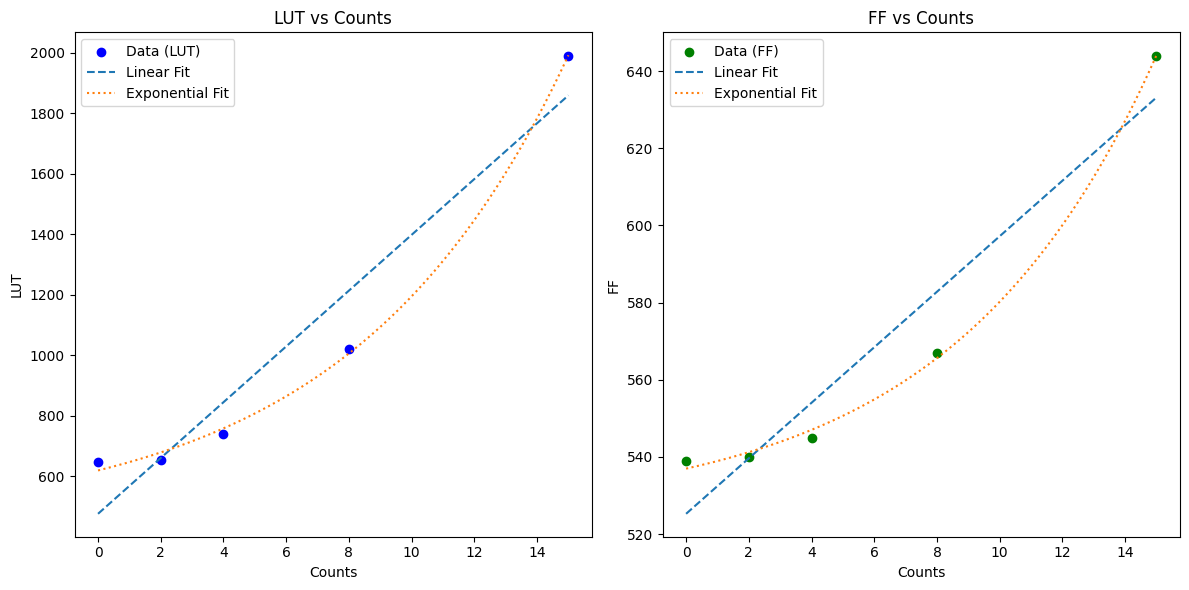

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Given data
counts = np.array([0, 2, 4, 8, 15])
lut = np.array([647, 656, 741, 1022, 1990])
ff = np.array([539, 540, 545, 567, 644])

# Define linear and exponential models
def linear(x, a, b):
    return a * x + b

def exponential(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the models
params_linear_lut, _ = curve_fit(linear, counts, lut)
params_exp_lut, _ = curve_fit(exponential, counts, lut, maxfev=5000)

params_linear_ff, _ = curve_fit(linear, counts, ff)
params_exp_ff, _ = curve_fit(exponential, counts, ff, maxfev=5000)

# Generate fitted curves
x_vals = np.linspace(0, 15, 300)
fit_linear_lut = linear(x_vals, *params_linear_lut)
fit_exp_lut = exponential(x_vals, *params_exp_lut)

fit_linear_ff = linear(x_vals, *params_linear_ff)
fit_exp_ff = exponential(x_vals, *params_exp_ff)

# Plotting
plt.figure(figsize=(12, 6))

# LUT plot
plt.subplot(1, 2, 1)
plt.scatter(counts, lut, label='Data (LUT)', color='blue')
plt.plot(x_vals, fit_linear_lut, label='Linear Fit', linestyle='--')
plt.plot(x_vals, fit_exp_lut, label='Exponential Fit', linestyle=':')
plt.title('LUT vs Counts')
plt.xlabel('Counts')
plt.ylabel('LUT')
plt.legend()

# FF plot
plt.subplot(1, 2, 2)
plt.scatter(counts, ff, label='Data (FF)', color='green')
plt.plot(x_vals, fit_linear_ff, label='Linear Fit', linestyle='--')
plt.plot(x_vals, fit_exp_ff, label='Exponential Fit', linestyle=':')
plt.title('FF vs Counts')
plt.xlabel('Counts')
plt.ylabel('FF')
plt.legend()

plt.tight_layout()
plt.show()
